In [6]:
import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import explained_variance_score

from prophet import Prophet

In [7]:
path = "./dataset/Baron_dataset"
file = ["2015-08-07","2015-08-08","2015-09-03","2015-09-09","2015-09-11"]
dfs = []
for i in range(5):
    filenames = glob.glob(path + "/" + file[i] + "/*.txt")
    cols = []
    for filename in filenames:
        cols.append(pd.read_csv(filename, index_col=None, header=None))
    df = pd.DataFrame(pd.concat(cols, axis=1, ignore_index=None))
    df.columns = ['AIRGAP1' , 'AIRGAP2' , 'AIRGAP3' , 'AIRGAP4' , 'CURRENT_DEPTH1' ,
              'CURRENT_DEPTH2' , 'CURRENT_DEPTH3' , 'CURRENT_DEPTH4' , 'CURRENT_DEPTH5' ,
              'CURRENT_DEPTH6' , 'CURRENT_DEPTH7' , 'CURRENT_DIRECTION1' , 'CURRENT_DIRECTION2' , 
              'CURRENT_DIRECTION3' , 'CURRENT_DIRECTION4' , 'CURRENT_DIRECTION5' , 'CURRENT_DIRECTION6' , 
              'CURRENT_DIRECTION7' , 'CURRENT_SPEED1' , 'CURRENT_SPEED2' , 'CURRENT_SPEED3' , 'CURRENT_SPEED4' ,
              'CURRENT_SPEED5' , 'CURRENT_SPEED6' , 'CURRENT_SPEED7' , 'MOORING1_LENGTH',  'MOORING1_TENSION1' ,
              'MOORING1_TENSION2' , 'MOORING2_LENGTH' , 'MOORING2_TENSION1' , 'MOORING2_TENSION2' ,
              'MOORING3_LENGTH' , 'MOORING3_TENSION1' , 'MOORING3_TENSION2' , 'MOORING4_LENGTH' ,
              'MOORING4_TENSION1' , 'MOORING4_TENSION2' , 'MOORING5_LENGTH' , 'MOORING5_TENSION1' ,
              'MOORING5_TENSION2' , 'MOORING6_LENGTH' , 'MOORING6_TENSION1' , 'MOORING6_TENSION2' ,
              'MOORING7_LENGTH' , 'MOORING7_TENSION1' , 'MOORING7_TENSION2' , 'MOORING8_LENGTH' , 
              'MOORING8_TENSION1' , 'MOORING8_TENSION2' , 'MOORING9_LENGTH' , 'MOORING9_TENSION1' ,
              'MOORING9_TENSION2' , 'MOTION_TILTX' , 'MOTION_TILTY' , 'MOTION_YAW' , 'POSITION_X' ,
              'POSITION_Y' , 'WIND1_DIRECTION' , 'WIND1_SPEED' , 'WIND2_DIRECTION' , 'WIND2_SPEED']
    df = df.drop(['CURRENT_DEPTH1' , 'CURRENT_DEPTH2' , 'CURRENT_DEPTH3' , 'CURRENT_DEPTH4' ,
                'CURRENT_DEPTH5' , 'CURRENT_DEPTH6' , 'CURRENT_DEPTH7','MOORING1_LENGTH','MOORING2_LENGTH','MOORING3_LENGTH','MOORING4_LENGTH','MOORING5_LENGTH','MOORING6_LENGTH','MOORING7_LENGTH','MOORING8_LENGTH','MOORING9_LENGTH'],axis=1)
    dfs.append(df)
df1 = dfs[0]
df2 = dfs[1]
df3 = dfs[2]
df4 = dfs[3]
df5 = dfs[4]

In [8]:
x = df1.drop(['MOORING1_TENSION1'], axis = 1)
y = df1['MOORING1_TENSION1']

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x.columns = ['AIRGAP1', 'AIRGAP2', 'AIRGAP3', 'AIRGAP4', 'CURRENT_DIRECTION1',
       'CURRENT_DIRECTION2', 'CURRENT_DIRECTION3', 'CURRENT_DIRECTION4',
       'CURRENT_DIRECTION5', 'CURRENT_DIRECTION6', 'CURRENT_DIRECTION7',
       'CURRENT_SPEED1', 'CURRENT_SPEED2', 'CURRENT_SPEED3', 'CURRENT_SPEED4',
       'CURRENT_SPEED5', 'CURRENT_SPEED6', 'CURRENT_SPEED7',
       'MOORING1_TENSION2', 'MOORING2_TENSION1', 'MOORING2_TENSION2',
       'MOORING3_TENSION1', 'MOORING3_TENSION2', 'MOORING4_TENSION1',
       'MOORING4_TENSION2', 'MOORING5_TENSION1', 'MOORING5_TENSION2',
       'MOORING6_TENSION1', 'MOORING6_TENSION2', 'MOORING7_TENSION1',
       'MOORING7_TENSION2', 'MOORING8_TENSION1', 'MOORING8_TENSION2',
       'MOORING9_TENSION1', 'MOORING9_TENSION2', 'MOTION_TILTX',
       'MOTION_TILTY', 'MOTION_YAW', 'POSITION_X', 'POSITION_Y',
       'WIND1_DIRECTION', 'WIND1_SPEED', 'WIND2_DIRECTION', 'WIND2_SPEED']

x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = .2,
                                                   random_state = 100,
                                                   shuffle = False)

In [16]:
dates = pd.date_range('2015-08-07 00:00:00', periods = 86400, freq = '1S')
dates

DatetimeIndex(['2015-08-07 00:00:00', '2015-08-07 00:00:01',
               '2015-08-07 00:00:02', '2015-08-07 00:00:03',
               '2015-08-07 00:00:04', '2015-08-07 00:00:05',
               '2015-08-07 00:00:06', '2015-08-07 00:00:07',
               '2015-08-07 00:00:08', '2015-08-07 00:00:09',
               ...
               '2015-08-07 23:59:50', '2015-08-07 23:59:51',
               '2015-08-07 23:59:52', '2015-08-07 23:59:53',
               '2015-08-07 23:59:54', '2015-08-07 23:59:55',
               '2015-08-07 23:59:56', '2015-08-07 23:59:57',
               '2015-08-07 23:59:58', '2015-08-07 23:59:59'],
              dtype='datetime64[ns]', length=86400, freq='S')

In [23]:
df1_ = df1.copy()
df1_.index = dates
df1_ = df1_[['MOORING1_TENSION1']]
df1_

,MOORING1_TENSION1
2015-08-07 00:00:00,403
2015-08-07 00:00:01,403
2015-08-07 00:00:02,403
2015-08-07 00:00:03,403
2015-08-07 00:00:04,403
...,...
2015-08-07 23:59:55,415
2015-08-07 23:59:56,415
2015-08-07 23:59:57,415
2015-08-07 23:59:58,415


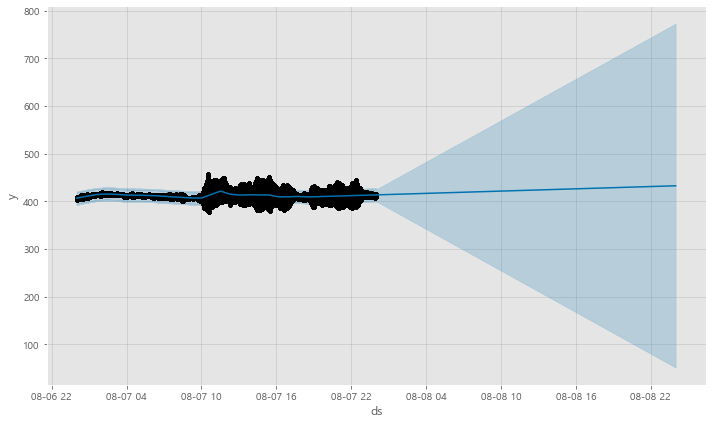

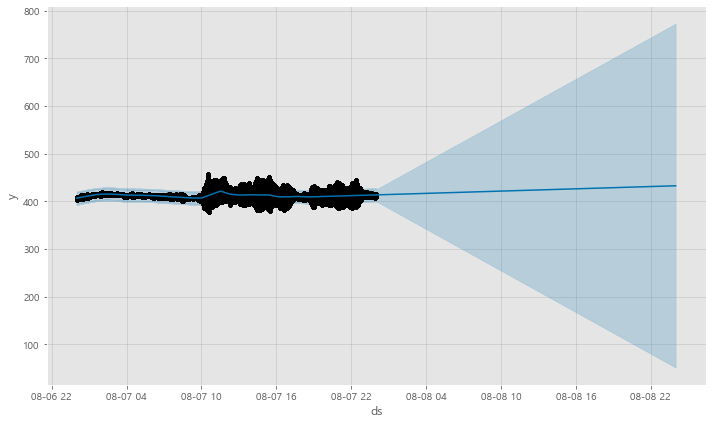

In [31]:
df1_ = df1.copy()
df1_['ds'] = dates
df1_ = df1_[['ds', 'MOORING1_TENSION1']]
df1_ = df1_.rename(columns = {'MOORING1_TENSION1' : 'y'})

m = Prophet(yearly_seasonality = False, weekly_seasonality = False, daily_seasonality = False).fit(df1_)

future = m.make_future_dataframe(periods = 0.5)
forecast = m.predict(future)

m.plot(forecast)

<AxesSubplot:>

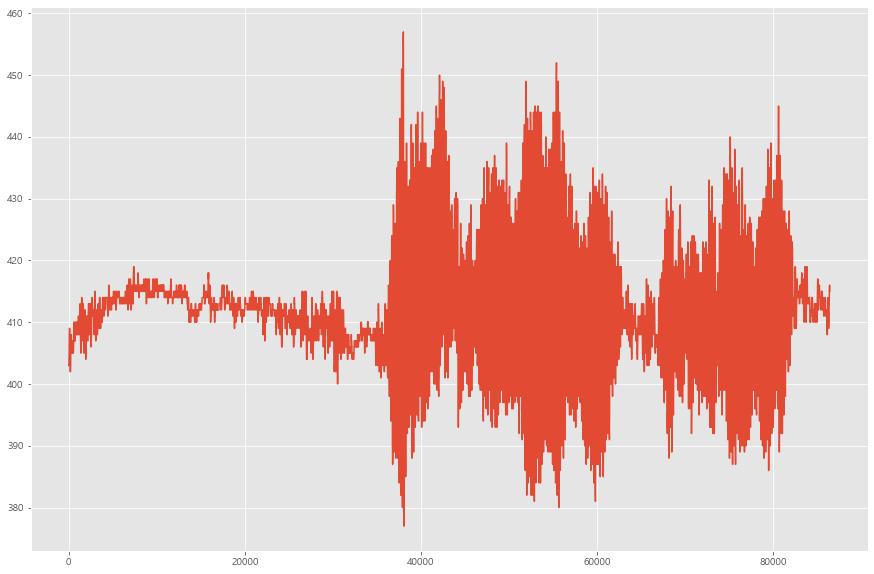

In [33]:
plt.figure(figsize = (15, 10))
df1['MOORING1_TENSION1'].plot()

## 데이터 반만 나누고 다시 예측해보자

In [35]:
dates = pd.date_range('2015-08-07 12:00:00', periods = 43200, freq = '1S')
dates

DatetimeIndex(['2015-08-07 12:00:00', '2015-08-07 12:00:01',
               '2015-08-07 12:00:02', '2015-08-07 12:00:03',
               '2015-08-07 12:00:04', '2015-08-07 12:00:05',
               '2015-08-07 12:00:06', '2015-08-07 12:00:07',
               '2015-08-07 12:00:08', '2015-08-07 12:00:09',
               ...
               '2015-08-07 23:59:50', '2015-08-07 23:59:51',
               '2015-08-07 23:59:52', '2015-08-07 23:59:53',
               '2015-08-07 23:59:54', '2015-08-07 23:59:55',
               '2015-08-07 23:59:56', '2015-08-07 23:59:57',
               '2015-08-07 23:59:58', '2015-08-07 23:59:59'],
              dtype='datetime64[ns]', length=43200, freq='S')

In [46]:
df11 = df1[43200:86400]
df11['ds'] = dates
df11 = df11.rename(columns = {'MOORING1_TENSION1' : 'y'})
df11 = df11[['ds', 'y']]
df11 = df11.reset_index()
df11.drop('index', axis = 1, inplace = True)
df11

C:\Users\User\AppData\Local\Temp/ipykernel_7808/3131897062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['ds'] = dates


,ds,y
0,2015-08-07 12:00:00,412
1,2015-08-07 12:00:01,412
2,2015-08-07 12:00:02,412
3,2015-08-07 12:00:03,412
4,2015-08-07 12:00:04,412
...,...,...
43195,2015-08-07 23:59:55,415
43196,2015-08-07 23:59:56,415
43197,2015-08-07 23:59:57,415
43198,2015-08-07 23:59:58,415


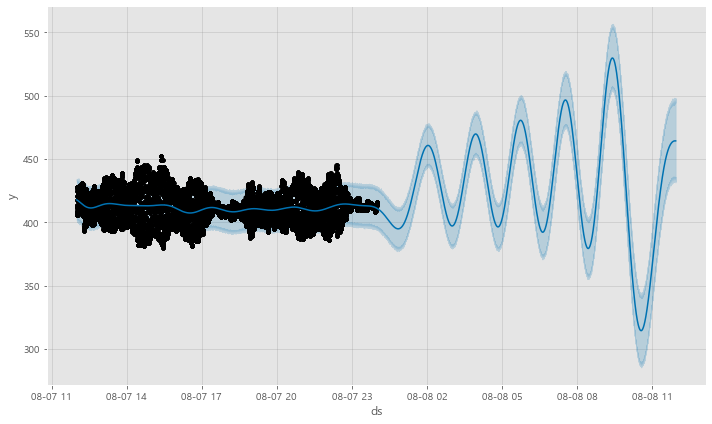

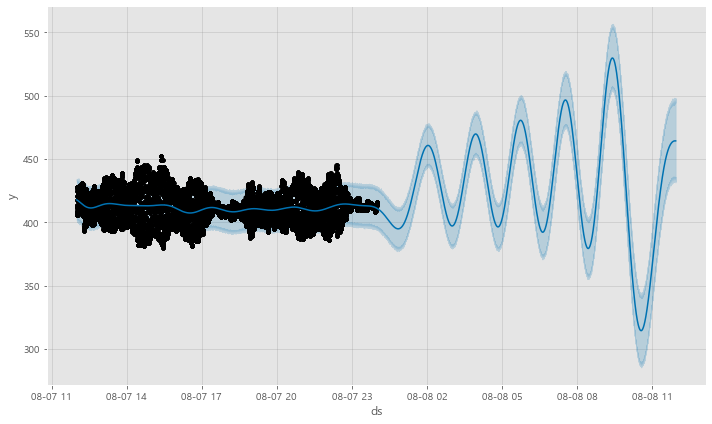

In [77]:
m = Prophet(yearly_seasonality = False, weekly_seasonality = False, daily_seasonality = 15, changepoint_prior_scale = 0.1).fit(df11)

future = m.make_future_dataframe(periods = 43000, freq = '1S')
forecast = m.predict(future)

m.plot(forecast)

## 향후 1일간의 Time Stamp 생성

In [53]:
time_stamp = 86400
df_forecast = m.make_future_dataframe(periods = time_stamp, freq = '1S')
df_forecast.tail()

,ds
129595,2015-08-08 23:59:55
129596,2015-08-08 23:59:56
129597,2015-08-08 23:59:57
129598,2015-08-08 23:59:58
129599,2015-08-08 23:59:59


In [54]:
df_forecast = m.predict(df_forecast)
df_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-08-07 12:00:00,417.904856,402.051574,434.012208,417.904856,417.904856,0.0,0.0,0.0,0.0,0.0,0.0,417.904856
1,2015-08-07 12:00:01,417.900181,401.842860,433.199518,417.900181,417.900181,0.0,0.0,0.0,0.0,0.0,0.0,417.900181
2,2015-08-07 12:00:02,417.895507,403.308557,432.852530,417.895507,417.895507,0.0,0.0,0.0,0.0,0.0,0.0,417.895507
3,2015-08-07 12:00:03,417.890832,402.286081,433.374687,417.890832,417.890832,0.0,0.0,0.0,0.0,0.0,0.0,417.890832
4,2015-08-07 12:00:04,417.886157,403.240168,433.575372,417.886157,417.886157,0.0,0.0,0.0,0.0,0.0,0.0,417.886157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,2015-08-08 23:59:55,445.766583,-552.133401,1401.342986,-547.107254,1404.129016,0.0,0.0,0.0,0.0,0.0,0.0,445.766583
129596,2015-08-08 23:59:56,445.766949,-543.526373,1405.561961,-547.130496,1404.149984,0.0,0.0,0.0,0.0,0.0,0.0,445.766949
129597,2015-08-08 23:59:57,445.767315,-554.659985,1389.903888,-547.153738,1404.170951,0.0,0.0,0.0,0.0,0.0,0.0,445.767315
129598,2015-08-08 23:59:58,445.767680,-543.904802,1407.926172,-547.176980,1404.191919,0.0,0.0,0.0,0.0,0.0,0.0,445.767680


In [55]:
df_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-08-07 12:00:00,417.904856,402.051574,434.012208
1,2015-08-07 12:00:01,417.900181,401.842860,433.199518
2,2015-08-07 12:00:02,417.895507,403.308557,432.852530
3,2015-08-07 12:00:03,417.890832,402.286081,433.374687
4,2015-08-07 12:00:04,417.886157,403.240168,433.575372
...,...,...,...,...
129595,2015-08-08 23:59:55,445.766583,-552.133401,1401.342986
129596,2015-08-08 23:59:56,445.766949,-543.526373,1405.561961
129597,2015-08-08 23:59:57,445.767315,-554.659985,1389.903888
129598,2015-08-08 23:59:58,445.767680,-543.904802,1407.926172


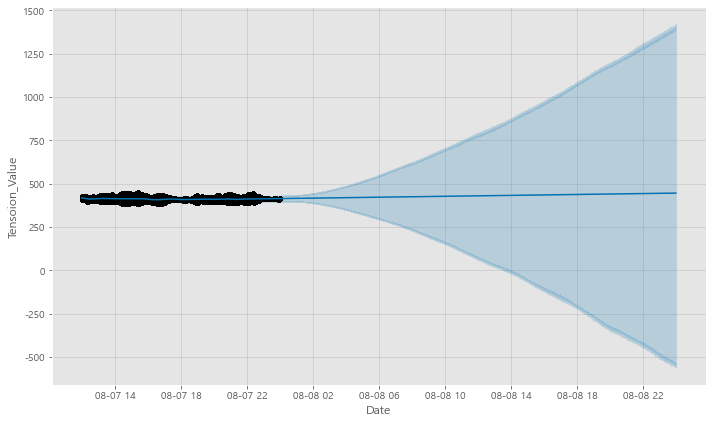

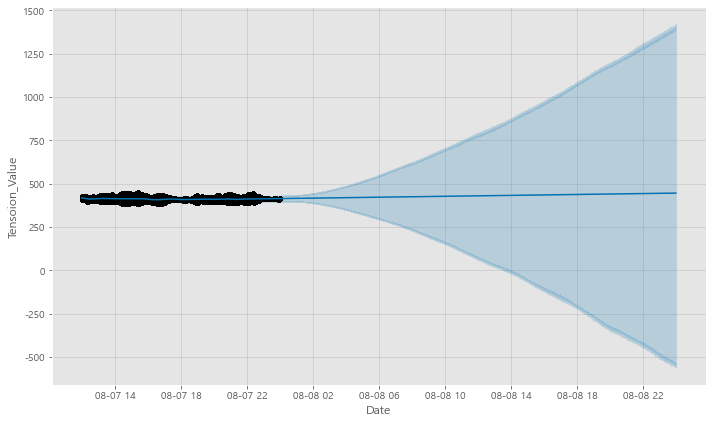

In [56]:
m.plot(df_forecast, xlabel = 'Date', ylabel = 'Tensoion_Value')